In [29]:
# !pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yfin
from sklearn import metrics
%matplotlib inline

In [82]:
data = pd.read_csv("/content/drive/MyDrive/Stock Prediction Analysis/GOOG.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-21,851.400024,853.500000,829.020020,830.460022,830.460022,2463500
1,2017-03-22,831.909973,835.549988,827.179993,829.590027,829.590027,1401500
2,2017-03-23,821.000000,822.570007,812.257019,817.580017,817.580017,3487100
3,2017-03-24,820.080017,821.929993,808.890015,814.429993,814.429993,1981000
4,2017-03-27,806.950012,821.630005,803.369995,819.510010,819.510010,1894300


In [83]:
data['Date'] = pd.to_datetime(data.Date)

In [84]:
data.shape

(1259, 7)

In [85]:
data.drop('Adj Close', axis=1, inplace=True)

In [86]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-03-21,851.400024,853.500000,829.020020,830.460022,2463500
1,2017-03-22,831.909973,835.549988,827.179993,829.590027,1401500
2,2017-03-23,821.000000,822.570007,812.257019,817.580017,3487100
3,2017-03-24,820.080017,821.929993,808.890015,814.429993,1981000
4,2017-03-27,806.950012,821.630005,803.369995,819.510010,1894300


In [87]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [88]:
data.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1259 non-null   datetime64[ns]
 1   Open    1259 non-null   float64       
 2   High    1259 non-null   float64       
 3   Low     1259 non-null   float64       
 4   Close   1259 non-null   float64       
 5   Volume  1259 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [90]:
data.describe()

,Open,High,Low,Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,1522.299564,1537.725595,1507.559022,1523.082704,1.567698e+06
std,631.834803,637.660236,625.336467,631.320651,6.951136e+05
min,806.950012,821.630005,803.369995,814.429993,3.468000e+05
25%,1079.679993,1092.362488,1066.925477,1079.744995,1.126400e+06
50%,1225.000000,1234.869995,1211.469971,1221.099976,1.394700e+06
75%,1766.869995,1782.880005,1748.657471,1765.320007,1.785450e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,6.207000e+06


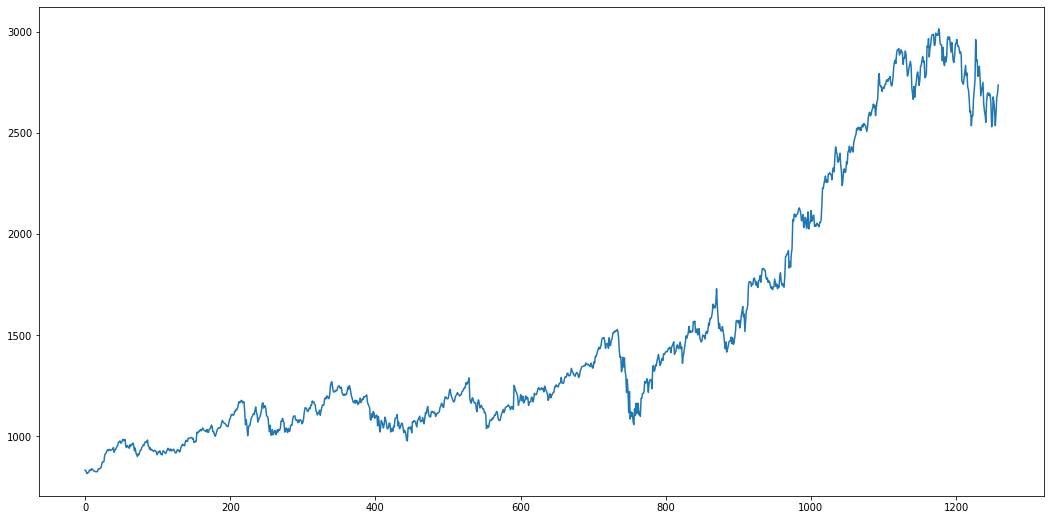

In [91]:
data['Close'].plot(figsize=(18, 9))

In [92]:
x = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y , random_state=0)

In [95]:
print(x_train.shape)
print(y_train.shape)

(944, 4)
(944,)


In [96]:
x_test.shape

(315, 4)

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [98]:
regressor.fit(x_train, y_train)

LinearRegression()

In [99]:
print(regressor.coef_)

[-5.76933277e-01  8.15175374e-01  7.61458914e-01 -7.46799109e-07]


In [100]:
print(regressor.intercept_)

1.148568859658326


In [101]:
predicted = regressor.predict(x_test)

In [102]:
x_test

,Open,High,Low,Volume
5,820.409973,825.989990,814.026978,1620500
494,1126.729980,1147.079956,1123.300049,1212400
52,976.549988,986.909973,975.099976,1252100
986,2119.270020,2130.530029,2097.409912,1457400
186,1046.119995,1046.665039,1038.380005,1282700
...,...,...,...,...
1056,2422.000000,2437.970947,2404.879883,958300
1010,2044.810059,2058.870117,2010.729980,1418900
737,1433.000000,1438.140015,1382.400024,2478300
459,1080.000000,1092.375000,1079.339966,1331800


In [103]:
predicted.shape

(315,)

In [104]:
dframe = pd.DataFrame(y_test, predicted)

In [105]:
dfr = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predicted})
dfr

,Actual Price,Predicted Price
5,820.919983,819.791365
494,1142.319946,1140.613298
52,983.679993,983.812593
986,2101.139893,2111.229875
186,1040.609985,1040.548489
...,...,...
1056,2429.810059,2421.691619
1010,2044.359985,2029.798453
737,1388.449951,1397.529537
459,1080.969971,1089.416281


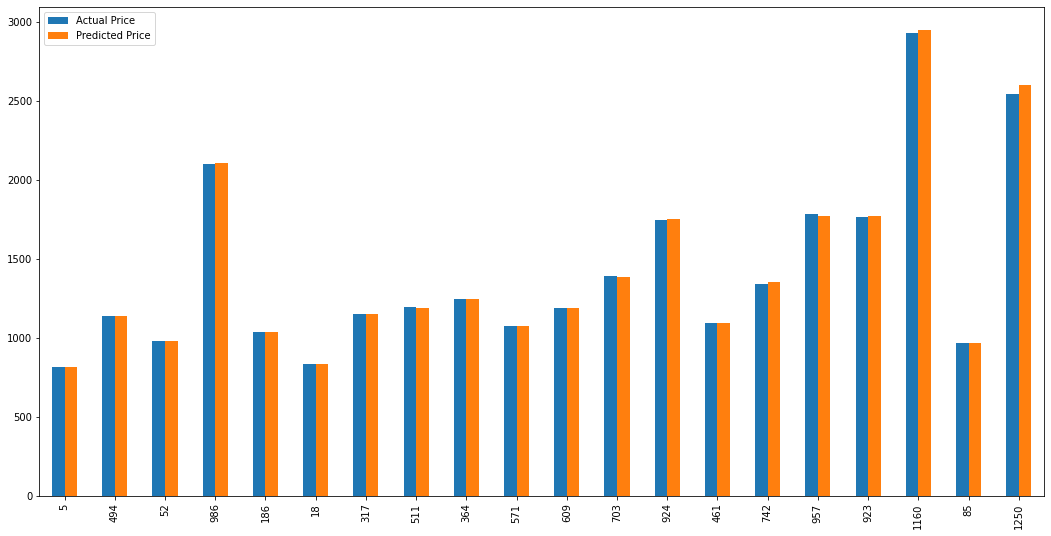

In [117]:
dfr.head(20).plot(figsize=(18,9), kind = 'bar')

In [114]:
dfr.head(20)

,Actual Price,Predicted Price
5,820.919983,819.791365
494,1142.319946,1140.613298
52,983.679993,983.812593
986,2101.139893,2111.229875
186,1040.609985,1040.548489
18,837.169983,835.217634
317,1155.479980,1152.653314
511,1200.489990,1193.090776
364,1249.300049,1247.196346
571,1076.010010,1079.969202


In [107]:
regressor.score(x_test, y_test)

0.9996754298720018

In [118]:
import math
print("Mean absolute valued Error : ", metrics.mean_absolute_error(y_test, predicted))

Mean absolute valued Error :  7.56218085398879


In [119]:
print("Mean squared Error : ", metrics.mean_squared_error(y_test, predicted))

Mean squared Error :  125.3837549125498


In [120]:
print("Root Mean squared Error : ", math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Root Mean squared Error :  11.197488777067374
